In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

df_veg = pd.read_csv("data_vegetals.csv")
df_ani = pd.read_csv("data_animals.csv")
df_pop = pd.read_csv("data_population.csv")
df_grc = pd.read_csv("data_country_group.csv")
df_gdp = pd.read_csv("GDP_per_capita.csv") # source : https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

# autres sources : https://www.worldometers.info/world-population/#table-historical

In [245]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# print(world.head())
noms_des_pays = world['name'].reset_index()
noms_des_pays['area'] = noms_des_pays['name']
noms_des_pays = noms_des_pays[['area', 'name']]

display(noms_des_pays)

/tmp/ipykernel_187459/823671942.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,area,name
0,Fiji,Fiji
1,Tanzania,Tanzania
2,W. Sahara,W. Sahara
3,Canada,Canada
4,United States of America,United States of America
...,...,...
172,Serbia,Serbia
173,Montenegro,Montenegro
174,Kosovo,Kosovo
175,Trinidad and Tobago,Trinidad and Tobago


In [246]:
display(df_gdp)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


problèmes de données non utilisées :
* Groundnuts
* Rape and Mustardseed
* Milk - Excluding Butter
* Infant food
* Miscellaneous
* Sunflower seed
* Cottonseed

nom ?
* Alcohol, Non-Food

In [247]:
### 01 RENOMMER LES COLONNES

# autre façon de faire
# df = df_data_p.rename(columns=lambda x: x.lower().replace(' ', '_'))

df_veg.columns = [title.lower().strip().replace(" ", "_").replace("(", "").replace(")", "") for title in df_veg.columns]
df_ani.columns = [title.lower().strip().replace(" ", "_").replace("(", "").replace(")", "") for title in df_ani.columns]
df_pop.columns = [title.lower().strip().replace(" ", "_").replace("(", "").replace(")", "") for title in df_pop.columns]
df_grc.columns = [title.lower().strip().replace(" ", "_").replace("(", "").replace(")", "") for title in df_grc.columns]
df_gdp.columns = [title.lower().strip().replace(" ", "_").replace("(", "").replace(")", "") for title in df_gdp.columns]

df_pop2 = df_pop

print(df_ani.loc[1])

domain_code                                         FBS
domain                            Food Balances (2010-)
area_code_m49                                         4
area                                        Afghanistan
element_code                                        645
element             Food supply quantity (kg/capita/yr)
item_code_fbs                                     S2731
item                                        Bovine Meat
year_code                                          2019
year                                               2019
unit                                                 kg
value                                              2.76
flag                                                  E
flag_description                        Estimated value
Name: 1, dtype: object


In [248]:
### 02 DIMENSIONS DU JEU DE DONNEES DE "POPULATION"

print("nombre de colonnes :", df_pop.shape[1])

print("nombre de lignes :", df_pop.shape[0])

nombre de colonnes : 14
nombre de lignes : 366


In [249]:
### 03 LES 5 PREMIERES LIGNES
display(df_pop.iloc[:5, 3])

0    Afghanistan
1    Afghanistan
2        Albania
3        Albania
4        Algeria
Name: area, dtype: object

In [250]:
### 04 fusion des dataframe df_ani et df_veg

df_ani.insert(loc=0, column='type', value='animal')
# ou
df_veg['type'] = "vegetal"

In [251]:
### 04 suite

df_pro = pd.concat([df_veg, df_ani], ignore_index=False)

display(df_pro)

,domain_code,domain,area_code_m49,area,element_code,element,item_code_fao,item,year_code,year,unit,value,flag,flag_description,type,item_code_fbs
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2018,2018,kg,162.62,E,Estimated value,vegetal,NaN
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),2511.0,Wheat and products,2019,2019,kg,160.40,E,Estimated value,vegetal,NaN
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),2511.0,Wheat and products,2018,2018,kcal/cap/d,1365.34,E,Estimated value,vegetal,NaN
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),2511.0,Wheat and products,2019,2019,kcal/cap/d,1346.93,E,Estimated value,vegetal,NaN
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),2511.0,Wheat and products,2018,2018,g/cap/d,41.23,E,Estimated value,vegetal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,FBS,Food Balances (2010-),716,Zimbabwe,684,Fat supply quantity (g/capita/day),NaN,"Molluscs, Other",2019,2019,g/cap/d,0.00,E,Estimated value,animal,S2767
26381,FBS,Food Balances (2010-),716,Zimbabwe,645,Food supply quantity (kg/capita/yr),NaN,"Aquatic Animals, Others",2019,2019,kg,0.00,E,Estimated value,animal,S2769
26382,FBS,Food Balances (2010-),716,Zimbabwe,664,Food supply (kcal/capita/day),NaN,"Aquatic Animals, Others",2019,2019,kcal/cap/d,0.00,E,Estimated value,animal,S2769
26383,FBS,Food Balances (2010-),716,Zimbabwe,674,Protein supply quantity (g/capita/day),NaN,"Aquatic Animals, Others",2019,2019,g/cap/d,0.00,E,Estimated value,animal,S2769


In [252]:
### 05 Transformez df_pop


# pays, le pays, l’année et la population
df_pop = df_pop[['area_code_m49', 'year', 'value']]

df_pop.columns = ['area_code_m49', 'year', 'pop_1000_hab']
# ou df_pop.rename(columns={'value': 'pop_1000_hab'})


In [253]:
### 05 suite

print(df_pop[df_pop['area_code_m49'] == 4])


   area_code_m49  year  pop_1000_hab
0              4  2018      36686.78
1              4  2019      37769.50


In [254]:
### 06 Transformez products

df_pro = df_pro[['area_code_m49', 'area', 'element', 'item', 'year', 'type', 'value', 'unit']]


In [255]:
### 06 suite

print(df_pro.columns)


Index(['area_code_m49', 'area', 'element', 'item', 'year', 'type', 'value',
       'unit'],
      dtype='object')


In [256]:
### 07 Fusionnez df_pop avec product

df_merge = pd.merge(df_pop, df_pro, on=['area_code_m49', 'year'], how='inner')


In [257]:
### 07 suite

print(df_merge.iloc[1])


area_code_m49                                4
year                                      2018
pop_1000_hab                          36686.78
area                               Afghanistan
element          Food supply (kcal/capita/day)
item                        Wheat and products
type                                   vegetal
value                                  1365.34
unit                                kcal/cap/d
Name: 1, dtype: object


In [258]:
### 08 type de données par colonne
display(df_merge.info())
display(df_merge.describe()) # describe() ne fonctionne que sur les valeurs numériques

for title in df_pro.columns:
    print(title, type(title))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112611 entries, 0 to 112610
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   area_code_m49  112611 non-null  int64  
 1   year           112611 non-null  int64  
 2   pop_1000_hab   112611 non-null  float64
 3   area           112611 non-null  object 
 4   element        112611 non-null  object 
 5   item           112611 non-null  object 
 6   type           112611 non-null  object 
 7   value          112611 non-null  float64
 8   unit           112611 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 7.7+ MB


None

,area_code_m49,year,pop_1000_hab,value
count,112611.000000,112611.000000,1.126110e+05,112611.000000
mean,425.504338,2018.508858,5.221383e+04,11.236271
std,250.520642,0.499924,1.890846e+05,56.120151
min,4.000000,2018.000000,1.213000e+01,0.000000
25%,204.000000,2018.000000,2.609490e+03,0.010000
50%,418.000000,2019.000000,1.015252e+04,0.260000
75%,642.000000,2019.000000,3.235359e+04,3.250000
max,894.000000,2019.000000,1.453802e+06,1744.850000


area_code_m49 <class 'str'>
area <class 'str'>
element <class 'str'>
item <class 'str'>
year <class 'str'>
type <class 'str'>
value <class 'str'>
unit <class 'str'>


In [259]:
### 09 y a-t-il des valeurs NULL

v_null = ""
v_non_null = ""

for title in df_pro.columns:
    if df_pro[title].count() < len(df_pro):
        v_non_null += f"La variable '{title}' possède " + str(len(df_pro) - df_pro[title].count()) + " valeurs NULL.\n"
    else:
        v_null += f"La variable '{title}' n'a pas de valeur NULL.\n"

print(v_non_null, "\n", v_null)

 
 La variable 'area_code_m49' n'a pas de valeur NULL.
La variable 'area' n'a pas de valeur NULL.
La variable 'element' n'a pas de valeur NULL.
La variable 'item' n'a pas de valeur NULL.
La variable 'year' n'a pas de valeur NULL.
La variable 'type' n'a pas de valeur NULL.
La variable 'value' n'a pas de valeur NULL.
La variable 'unit' n'a pas de valeur NULL.



In [260]:
### 10 existe-t-il des valeurs abérentes

display(df_pro.describe())

,area_code_m49,year,value
count,112611.000000,112611.000000,112611.000000
mean,425.504338,2018.508858,11.236271
std,250.520642,0.499924,56.120151
min,4.000000,2018.000000,0.000000
25%,204.000000,2018.000000,0.010000
50%,418.000000,2019.000000,0.260000
75%,642.000000,2019.000000,3.250000
max,894.000000,2019.000000,1744.850000


In [261]:
### 11 valeurs uniques de la colonne country (area)

areas = df_merge.area.unique()
print(areas)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Icel

In [262]:
## 12 Gardez uniquement les informations relatives aux pays

# ce code supprime les lignes liées à :
    # China >>> China, Hong Kong SAR
    # China >>> China, Macao SAR
    # China >>> China, mainland
    # China >>> China, Taiwan Province of
    # Republic of Korea >>> Democratic People's Republic of Korea

# for area in areas:
#     for area_target in areas:
#         if area_target.find(area) >= 0 and len(area) < len(area_target) and area not in ('Congo', 'Dominica', 'Guinea', 'Ireland', 'Niger', 'Sudan'):
#             print(area, ">>>", area_target)
#             df_merge = df_merge[df_merge['area'] != area_target]

print(df_merge.area.unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Icel

In [263]:
### 13 index par area_code, area, year, pop_1000_hab, type et item

df_merge = df_merge.sort_values(['area_code_m49', 'year', 'pop_1000_hab', 'type', 'item'])
df_merge = df_merge.reset_index(drop=True)

### ChatGPT
# Création d'une condition pour identifier les changements
condition = (
    (df_merge['area_code_m49'] != df_merge['area_code_m49'].shift(1)) |
    (df_merge['year'] != df_merge['year'].shift(1)) |
    (df_merge['pop_1000_hab'] != df_merge['pop_1000_hab'].shift(1)) |
    (df_merge['type'] != df_merge['type'].shift(1)) |
    (df_merge['item'] != df_merge['item'].shift(1))
)

# Comptage des changements et assignation à la colonne 'index2'
# df_merge['index2'] = condition.cumsumd()


### mon ancien code BEAUCOUP TROP LONG
# index2 = 1
# area_code_m49_old = ""
# year_old = ""
# pop_1000_hab_old = ""
# type_old = ""
# item_old = ""

# for index, row in df_merge.iterrows():
#     if area_code_m49_old != row['area_code_m49'] or \
#     year_old != row['year'] or \
#     pop_1000_hab_old != row['pop_1000_hab'] or \
#     type_old != row['type'] or \
#     item_old != row['item']:
#         index2 += 1
#         # 
#     df_merge['index2'] = index2

In [264]:
### 13 suite

df_pivot = df_merge.pivot_table(values='value', index=['area_code_m49', 'area', 'year', 'pop_1000_hab', 'type', 'item'], columns='element', aggfunc='sum')

In [265]:
### 13 suite

display(df_merge[df_merge['area'] == 'Afghanistan'])
display(df_pivot)

,area_code_m49,year,pop_1000_hab,area,element,item,type,value,unit
0,4,2018,36686.78,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,animal,2.67,kg
1,4,2018,36686.78,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,animal,14.92,kcal/cap/d
2,4,2018,36686.78,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,animal,1.12,g/cap/d
3,4,2018,36686.78,Afghanistan,Fat supply quantity (g/capita/day),Bovine Meat,animal,1.16,g/cap/d
4,4,2018,36686.78,Afghanistan,Food supply quantity (kg/capita/yr),"Butter, Ghee",animal,1.14,kg
...,...,...,...,...,...,...,...,...,...
563,4,2019,37769.50,Afghanistan,Fat supply quantity (g/capita/day),Wheat and products,vegetal,6.04,g/cap/d
564,4,2019,37769.50,Afghanistan,Food supply quantity (kg/capita/yr),Wine,vegetal,0.00,kg
565,4,2019,37769.50,Afghanistan,Food supply (kcal/capita/day),Wine,vegetal,0.01,kcal/cap/d
566,4,2019,37769.50,Afghanistan,Protein supply quantity (g/capita/day),Wine,vegetal,0.00,g/cap/d


element                                                                    Fat supply quantity (g/capita/day)  \
area_code_m49 area        year pop_1000_hab type    item                                                        
4             Afghanistan 2018 36686.78     animal  Bovine Meat                                          1.16   
                                                    Butter, Ghee                                         2.58   
                                                    Cream                                                0.03   
                                                    Demersal Fish                                        0.00   
                                                    Eggs                                                 0.38   
...                                                                                                       ...   
894           Zambia      2019 18380.48     vegetal Tea (including mate)                                 0.00   
                                                    Tomatoes and products                                0.01   
                                                    Vegetables, other                                    0.16   
                                                    Wheat and products                                   0.30   
                                                    Wine                                                 0.00   

element                                                                    Food supply (kcal/capita/day)  \
area_code_m49 area        year pop_1000_hab type    item                                                   
4             Afghanistan 2018 36686.78     animal  Bovine Meat                                    14.92   
                                                    Butter, Ghee                                   23.35   
                                                    Cream                                           0.31   
                                                    Demersal Fish                                   0.17   
                                                    Eggs                                            5.52   
...                                                                                                  ...   
894           Zambia      2019 18380.48     vegetal Tea (including mate)                            0.04   
                                                    Tomatoes and products                           0.77   
                                                    Vegetables, other                              13.58   
                                                    Wheat and products                             57.63   
                                                    Wine                                            0.32   

element                                                                    Food supply quantity (kg/capita/yr)  \
area_code_m49 area        year pop_1000_hab type    item                                                         
4             Afghanistan 2018 36686.78     animal  Bovine Meat                                           2.67   
                                                    Butter, Ghee                                          1.14   
                                                    Cream                                                 0.04   
                                                    Demersal Fish                                         0.15   
                                                    Eggs                                                  1.57   
...                                                                                                        ...   
894           Zambia      2019 18380.48     vegetal Tea (including mate)                                  0.10   
                                                    Tomatoes and products                          

In [266]:
### 13 suite

df_pivot.reset_index(inplace=True)



In [267]:
### 13 suite

# df_unit = df_pivot['unit']
# df_value = df_pivot['value']
# df_value.reset_index()
# df_value.columns = ['element', 'v1', 'v2', 'v3', 'v4']
display(df_pivot)

# df_merge = pd.merge(df_pop, df_pro, on=['area_code_m49', 'year'], how='inner')
# df_all = pd.merge(df_unit, df_value, on=['element'], how='inner')

# display(df_all)

element,area_code_m49,area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
28174,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
28175,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
28176,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
28177,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


In [268]:
### 14 nettoyage des noms de colonnes

df_pivot.columns = [title.lower().strip().replace(" ", "_") for title in df_pivot.columns]

In [269]:
### 15 mask

m_2018 = df_pivot['year'] == 2018

In [270]:
### 15 suite

display(df_pivot[m_2018])

,area_code_m49,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
28095,894,Zambia,2018,17835.89,vegetal,Tea (including mate),0.00,0.04,0.11,0.00
28096,894,Zambia,2018,17835.89,vegetal,Tomatoes and products,0.01,0.77,1.38,0.03
28097,894,Zambia,2018,17835.89,vegetal,"Vegetables, other",0.18,15.27,20.14,1.28
28098,894,Zambia,2018,17835.89,vegetal,Wheat and products,0.29,60.49,7.99,1.91


In [271]:
### 16 zone géographique.

# 'eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia'

df_grc['country_group'] = df_grc['country_group'].str.lower()

list_ok = ['eastern africa', 'middle africa', 'northern africa', 'southern africa', 'western africa', 'northern america', 'central america', 'caribbean', 'south america', 'central asia', 'eastern asia', 'southern asia', 'south-eastern asia', 'western asia', 'eastern europe', 'northern europe', 'southern europe', 'western europe', 'australia and new zealand', 'melanesia', 'micronesia', 'polynesia']

df_gc2 = df_grc['country_group'].isin(list_ok)

In [272]:
### 16 suite

display(df_grc[df_gc2])
display(df_grc)

,country_group_code,country_group,country_code,country,m49_code,iso2_code,iso3_code
446,5501,australia and new zealand,10,Australia,36.00,AU,AUS
447,5501,australia and new zealand,42,Christmas Island,162.00,CX,CXR
448,5501,australia and new zealand,43,Cocos (Keeling) Islands,166.00,CC,CCK
449,5501,australia and new zealand,92,Heard and McDonald Islands,334.00,HM,HMD
450,5501,australia and new zealand,156,New Zealand,554.00,NZ,NZL
...,...,...,...,...,...,...,...
2239,5404,western europe,256,Luxembourg,442.00,LU,LUX
2240,5404,western europe,140,Monaco,492.00,MC,MCO
2241,5404,western europe,150,Netherlands (Kingdom of the),528.00,NL,NLD
2242,5404,western europe,211,Switzerland,756.00,CH,CHE


,country_group_code,country_group,country_code,country,m49_code,iso2_code,iso3_code
0,5100,africa,601,"Africa, unspecified",577.0,F601,F601
1,5100,africa,4,Algeria,12.0,DZ,DZA
2,5100,africa,7,Angola,24.0,AO,AGO
3,5100,africa,53,Benin,204.0,BJ,BEN
4,5100,africa,20,Botswana,72.0,BW,BWA
...,...,...,...,...,...,...,...
2538,5000,world,246,Yemen Ar Rp,886.0,F246,F246
2539,5000,world,247,Yemen Dem,720.0,F247,F247
2540,5000,world,248,Yugoslav SFR,890.0,F248,F248
2541,5000,world,251,Zambia,894.0,ZM,ZMB


In [273]:
l1 = df_grc['country'].unique()

l2 = df_grc[df_gc2]
l2 = l2['country'].unique()

# Vérification si toutes les valeurs de liste_1 sont présentes dans liste_2
toutes_presentes = all(elem in l2 for elem in l1)
print(toutes_presentes)
toutes_presentes = all(elem in l1 for elem in l2)
print(toutes_presentes)

# Trouver les éléments de liste_1 qui ne sont pas dans liste_2
elements_absents = [elem for elem in l1 if elem not in l2]

print("Les éléments de l1 absents dans l2 sont :", elements_absents)

False
True
Les éléments de l1 absents dans l2 sont : ['Africa, unspecified', 'Adaptation Fund', 'African Development Bank (AfDB)', 'African Development Fund (AfDF)', 'Arab Bank for Economic Development in Africa (BADEA)', 'Arab Fund for Economic and Social Development (AFESD)', 'Arab Fund for Technical Assistance to African and Arab Countries', 'Arcadia Fund', 'Arcus Foundation', 'Asian Development Bank (AsDB)', 'Asian Infrastructure Investment Bank', 'BBVA Microfinance Foundation', 'Bernard van Leer Foundation', 'Bezos Earth Fund', 'Bill & Melinda Gates Foundation', 'Black Sea Trade & Development Bank', 'Bloomberg Family Foundation', 'Botnar Foundation', 'C&A Foundation', 'Caribbean Development Bank (CDB)', 'Carnegie Corporation of New York', 'Center of Excellence in Finance', 'Central Emergency Response Fund', 'Charity Projects Ltd (Comic Relief)', "Children's Investment Fund Foundation", 'Citi Foundation', 'Climate Investment Funds (CIF)', 'Conrad N. Hilton Foundation', 'Council of 

In [274]:
### dernier test pour vérifier que l'on a toutes les régions demandées dans le brief

l2 = df_grc[df_gc2]
l2 = l2['country_group'].unique()

# Trouver les éléments de liste_1 qui ne sont pas dans liste_2
elements_absents = [elem for elem in list_ok if elem not in l2]

print("Les éléments de l1 absents dans l2 sont :", elements_absents)

Les éléments de l1 absents dans l2 sont : []


In [275]:
### merge des données
# 28179

# permet de restreinde la liste group country
df_grc = df_grc[df_gc2]
# nettoyage
df_grc = df_grc[['country_group_code', 'country_group','m49_code']]
df_grc.columns = ['country_group_code', 'country_group', 'area_code_m49']

df_merge2 = pd.merge(df_pivot, df_grc)

df_merge2 = df_merge2[['country_group_code', 'country_group', 'area_code_m49', 'area', 'year', 'pop_1000_hab', 'type', 'item', 'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)', 'food_supply_quantity_(kg/capita/yr)', 'protein_supply_quantity_(g/capita/day)']]

/tmp/ipykernel_187459/1343250802.py:10: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_merge2 = pd.merge(df_pivot, df_grc)


In [276]:
display(df_merge2)

,country_group_code,country_group,area_code_m49,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,5303,southern asia,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
28174,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
28175,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
28176,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
28177,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


In [277]:
# suppression de pays en trop :
# China, mainland

display(df_merge2[df_merge2['area'] == 'China, mainland'])

print('-----')
df_merge2 = df_merge2[df_merge2['area'] != 'China, mainland']

display(df_merge2[df_merge2['area'] == 'China, mainland'])

,country_group_code,country_group,area_code_m49,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
5064,5302,eastern asia,156,"China, mainland",2018,1417069.47,animal,"Aquatic Animals, Others",0.02,0.91,0.70,0.17
5065,5302,eastern asia,156,"China, mainland",2018,1417069.47,animal,Bovine Meat,2.08,28.02,5.53,2.33
5066,5302,eastern asia,156,"China, mainland",2018,1417069.47,animal,"Butter, Ghee",0.32,2.92,0.14,0.00
5067,5302,eastern asia,156,"China, mainland",2018,1417069.47,animal,Cephalopods,0.01,0.82,0.44,0.17
5068,5302,eastern asia,156,"China, mainland",2018,1417069.47,animal,Cream,0.06,0.63,0.09,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
5225,5302,eastern asia,156,"China, mainland",2019,1421864.03,vegetal,Tea (including mate),0.01,0.75,0.00,0.06
5226,5302,eastern asia,156,"China, mainland",2019,1421864.03,vegetal,Tomatoes and products,0.19,20.54,36.73,0.88
5227,5302,eastern asia,156,"China, mainland",2019,1421864.03,vegetal,"Vegetables, other",2.23,259.15,338.45,16.26
5228,5302,eastern asia,156,"China, mainland",2019,1421864.03,vegetal,Wheat and products,4.17,617.91,70.28,21.92


-----


,country_group_code,country_group,area_code_m49,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)


# Etape 3

In [278]:
# ajout des valeurs PIB/hab
# 28013 23786

df_gdp = df_gdp[['country_name', '2018', '2019']]
df_gdp.columns = ['area', 'gdp_2018_USScurrent', 'gdp_2019_USScurrent']

df_merge2 = pd.merge(df_merge2, df_gdp, on=['area'], how='left')
df_merge2 = pd.merge(df_merge2, noms_des_pays, on=['area'], how='left')

display(df_merge2)

,country_group_code,country_group,area_code_m49,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),gdp_2018_USScurrent,gdp_2019_USScurrent,name
0,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,502.057099,500.522981,Afghanistan
1,5303,southern asia,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,502.057099,500.522981,Afghanistan
2,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,502.057099,500.522981,Afghanistan
3,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,502.057099,500.522981,Afghanistan
4,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,502.057099,500.522981,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28008,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00,1475.199836,1268.120941,Zambia
28009,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03,1475.199836,1268.120941,Zambia
28010,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12,1475.199836,1268.120941,Zambia
28011,5101,eastern africa,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80,1475.199836,1268.120941,Zambia


In [279]:
### 17 Quelle est la médiane de la variable food_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ?
# Interpréter ces valeurs en les intégrant dasn une phrase.
graisse = 'fat_supply_quantity_(g/capita/day)'
dispo = 'food_supply_(kcal/capita/day)'
dispo_quantite = 'food_supply_quantity_(kg/capita/yr)'
dispo_proteine = 'protein_supply_quantity_(g/capita/day)'

val_graisse = df_merge2[df_merge2[graisse].notna()]
val_graisse = val_graisse[graisse]
val_dispo = df_merge2[df_merge2[dispo].notna()]
val_dispo = val_dispo[dispo]
val_dispo_quantite = df_merge2[df_merge2[dispo_quantite].notna()]
val_dispo_quantite = val_dispo_quantite[dispo_quantite]
val_dispo_proteine = df_merge2[df_merge2[dispo_proteine].notna()]
val_dispo_proteine = val_dispo_proteine[dispo_proteine]

median = df_merge2[dispo_quantite].median()
Q1 = df_merge2[dispo_quantite].quantile(0.25)
Q2 = df_merge2[dispo_quantite].quantile(0.75)
mean = df_merge2[dispo_quantite].mean()
std = df_merge2[dispo_quantite].std()

texte = f"""Voici les informations liées à la variable '{dispo_quantite}' :
-    médiane : {median}
-         Q1 : {Q1}
-         Q2 : {Q2}
-    moyenne : {mean}
- écart type : {std}"""

print(texte)

Voici les informations liées à la variable 'food_supply_quantity_(kg/capita/yr)' :
-    médiane : 0.87
-         Q1 : 0.06
-         Q2 : 5.81
-    moyenne : 8.266077091013207
- écart type : 21.49753345884692


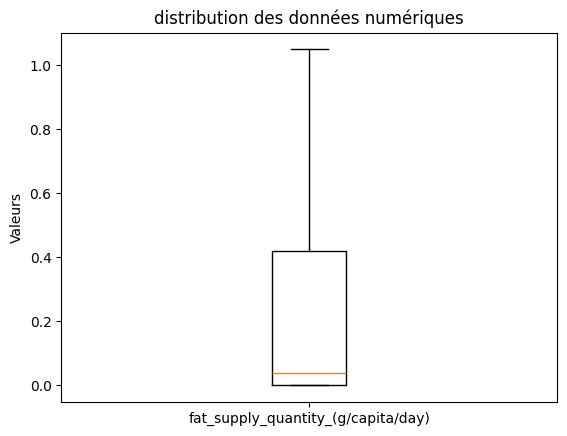

In [280]:
### 18 Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire.
# Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

# Générer des données aléatoires pour trois groupes
data1 = val_graisse
data = [data1]

# Créer le diagramme en boîte
plt.boxplot(data, labels=[graisse], showfliers=False)
plt.title('distribution des données numériques')
plt.ylabel('Valeurs')

# plt.yticks(ticks=[0, 5])

# Afficher le diagramme en boîte
plt.show()

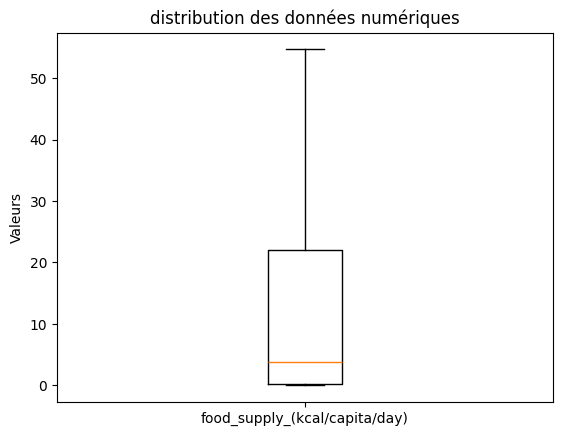

In [281]:
### 18 suiet

# Générer des données aléatoires pour trois groupes
data1 = val_dispo
data = [data1]

# Créer le diagramme en boîte
plt.boxplot(data, labels=[dispo], showfliers=False)
plt.title('distribution des données numériques')
plt.ylabel('Valeurs')

# plt.yticks(ticks=[0, 5])

# Afficher le diagramme en boîte
plt.show()

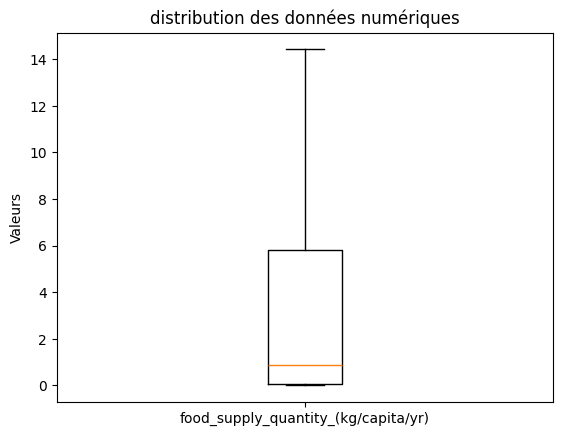

In [282]:
### 18 suiet

# Générer des données aléatoires pour trois groupes
data1 = val_dispo_quantite
data = [data1]

# Créer le diagramme en boîte
plt.boxplot(data, labels=[dispo_quantite], showfliers=False)
plt.title('distribution des données numériques')
plt.ylabel('Valeurs')

# plt.yticks(ticks=[0, 5])

# Afficher le diagramme en boîte
plt.show()

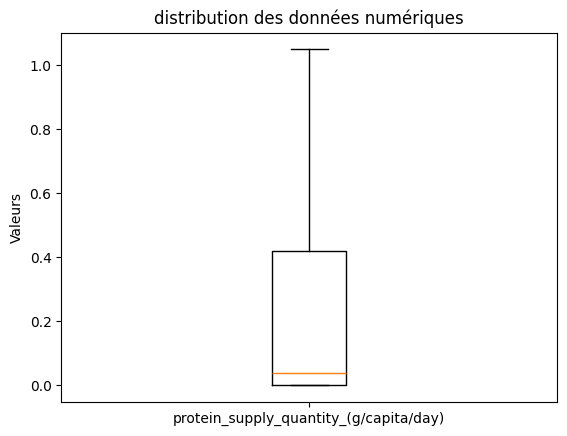

In [283]:
### 18 suiet

# Générer des données aléatoires pour trois groupes
data1 = val_dispo_proteine
data = [data1]

# Créer le diagramme en boîte
plt.boxplot(data, labels=[dispo_proteine], showfliers=False)
plt.title('distribution des données numériques')
plt.ylabel('Valeurs')

# plt.yticks(ticks=[0, 5])

# Afficher le diagramme en boîte
plt.show()

In [284]:
### 19 Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

m_ukraine = df_merge2['area'] == 'Ukraine'
m_2018 = df_merge2['year'] == 2018
m_2019 = df_merge2['year'] == 2019

df_ukraine = df_merge2[m_2018 & m_ukraine]
print("La population de l’Ukraine en 2018 est de", int(df_ukraine.pop_1000_hab.max() * 1000), "habitants.")



La population de l’Ukraine en 2018 est de 44446950 habitants.


In [285]:
### 20 Quels sont les 10 pays les plus peuplés ?

df = df_merge2.groupby('area').pop_1000_hab.max()

df = df.sort_values(ascending=False)

df.head(10)

area
China                       1453801.54
India                       1383112.05
United States of America     334319.67
Indonesia                    269582.88
Pakistan                     223293.28
Brazil                       211782.88
Nigeria                      203304.49
Bangladesh                   165516.22
Russian Federation           145742.29
Japan                        126255.87
Name: pop_1000_hab, dtype: float64

In [286]:
### 21 Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ?
# Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site.
# entre 7,4 et 7,8

resultat = df_merge2.groupby(['area', 'year']).pop_1000_hab.max().reset_index()
# resultat2 = df_merge2.groupby(['year']).pop_1000_hab.sum().multiply(1000)
resultat2 = df_merge2.groupby(['year']).pop_1000_hab.count()

print(type(resultat), "\n", resultat[resultat['area'] == 'China'])
print('-----')
print(resultat2)

<class 'pandas.core.frame.DataFrame'> 
      area  year  pop_1000_hab
64  China  2018    1448928.20
65  China  2019    1453801.54
-----
year
2018    13758
2019    14255
Name: pop_1000_hab, dtype: int64


In [287]:
df = df_merge2[m_2018]
df = df.groupby('area').pop_1000_hab.max().div(1000000)
print("population mondiale en 2018 :", round(df.sum(), 2), "Mh")

df = df_merge2[m_2019]
df = df.groupby('area').pop_1000_hab.max().div(1000000)
print("population mondiale en 2019 :", round(df.sum(), 2), "Mh")

population mondiale en 2018 : 7.65 Mh
population mondiale en 2019 : 7.75 Mh


In [288]:
### 22 Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays.
# Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

df_2018 = df_merge2[m_2018]
df_2018 = df_2018.groupby('area_code_m49').pop_1000_hab.max().reset_index()
df_2018.columns = ['area_code_m49', 'variation_N1']
df_2018['year'] = 2019
# df_2019 = df_merge2[m_2019]
# df_2019 = df_2019.groupby('area_code_m49').pop_1000_hab.max().reset_index()
# df_2019.columns = ['area_code_m49', 'variation_N1']
# df_2019['year'] = 2018

df_merge2 = pd.merge(df_merge2, df_2018, on=['area_code_m49', 'year'], how='left')

df_merge2['variation_N1'] = df_merge2['pop_1000_hab'] - df_merge2['variation_N1']

display(df_merge2[df_merge2['area'] == 'Afghanistan'])

,country_group_code,country_group,area_code_m49,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),gdp_2018_USScurrent,gdp_2019_USScurrent,name,variation_N1
0,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,502.057099,500.522981,Afghanistan,NaN
1,5303,southern asia,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,502.057099,500.522981,Afghanistan,NaN
2,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,502.057099,500.522981,Afghanistan,NaN
3,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,502.057099,500.522981,Afghanistan,NaN
4,5303,southern asia,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,502.057099,500.522981,Afghanistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,5303,southern asia,4,Afghanistan,2019,37769.50,vegetal,Tea (including mate),0.01,0.77,2.02,0.06,502.057099,500.522981,Afghanistan,1082.72
138,5303,southern asia,4,Afghanistan,2019,37769.50,vegetal,Tomatoes and products,0.00,0.50,0.90,0.02,502.057099,500.522981,Afghanistan,1082.72
139,5303,southern asia,4,Afghanistan,2019,37769.50,vegetal,"Vegetables, other",0.28,35.95,56.07,2.02,502.057099,500.522981,Afghanistan,1082.72
140,5303,southern asia,4,Afghanistan,2019,37769.50,vegetal,Wheat and products,6.04,1346.93,160.40,40.65,502.057099,500.522981,Afghanistan,1082.72


In [289]:
### 23 Quel est le taux de croissance moyen en fonction de la zone géographique ?

df = df_merge2.groupby('country_group').variation_N1.mean().div(1000).round(2).reset_index()

df.columns = ['Pays', 'Variation de 2018 à 2019 en MdH']

display(df.sort_values(by='Variation de 2018 à 2019 en MdH', ascending=False))

,Pays,Variation de 2018 à 2019 en MdH
17,southern asia,2.74
11,northern america,1.33
10,northern africa,0.75
15,south-eastern asia,0.74
4,eastern africa,0.73
9,middle africa,0.69
5,eastern asia,0.66
19,western africa,0.64
14,south america,0.31
20,western asia,0.29


In [290]:
### 24 Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !
# food_supply_quantity_(kg/capita/yr)	protein_supply_quantity_(g/capita/day)
# food_supply_quantity_kg_capita_yr	protein_supply_quantity_g_capita_day

df = df_merge2[['area', 'year', 'pop_1000_hab', 'food_supply_quantity_(kg/capita/yr)', 'protein_supply_quantity_(g/capita/day)']]
df.columns = [title.lower().strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for title in df.columns]
df['food_supply_quantity_kg_capita_yr'] = round(df['food_supply_quantity_kg_capita_yr'] * df['pop_1000_hab'] / 1000, 4)
df['protein_supply_quantity_g_capita_day'] = round(df['protein_supply_quantity_g_capita_day'] * df['pop_1000_hab'] / 1000000 * 365, 4)

df.columns = ['area', 'year', 'pop_1000_hab', 'nourriture_dispo_Gcal', 'proteine_dispo_1000t']

df = df.groupby(['area', 'year']).agg({
    'nourriture_dispo_Gcal': 'sum',
    'proteine_dispo_1000t': 'sum'
}).reset_index()

df


/tmp/ipykernel_187459/4288498296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['food_supply_quantity_kg_capita_yr'] = round(df['food_supply_quantity_kg_capita_yr'] * df['pop_1000_hab'] / 1000, 4)
/tmp/ipykernel_187459/4288498296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['protein_supply_quantity_g_capita_day'] = round(df['protein_supply_quantity_g_capita_day'] * df['pop_1000_hab'] / 1000000 * 365, 4)


,area,year,nourriture_dispo_Gcal,proteine_dispo_1000t
0,Afghanistan,2018,12292.2724,750.0113
1,Afghanistan,2019,13362.8495,755.4656
2,Albania,2018,2485.6214,82.2440
3,Albania,2019,2642.0440,85.0292
4,Algeria,2018,28930.0563,1215.2396
...,...,...,...,...
359,Yemen,2019,9289.8691,590.4654
360,Zambia,2018,7277.5781,312.8099
361,Zambia,2019,8283.5307,293.0436
362,Zimbabwe,2018,4537.9308,278.1631


In [291]:
### 25 En vous basant sur le résultat de la question précédente, calculez le ratio énergie/poids de chaque produit et pays.
# Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez
# la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre
# calcul en comparant le résultat avec l’apport calorique d’un œuf.

df['energie_Gcal/proteine_1000t'] = round(df['nourriture_dispo_Gcal'] / df['proteine_dispo_1000t'], 5)
display(df)


,area,year,nourriture_dispo_Gcal,proteine_dispo_1000t,energie_Gcal/proteine_1000t
0,Afghanistan,2018,12292.2724,750.0113,16.38945
1,Afghanistan,2019,13362.8495,755.4656,17.68823
2,Albania,2018,2485.6214,82.2440,30.22253
3,Albania,2019,2642.0440,85.0292,31.07220
4,Algeria,2018,28930.0563,1215.2396,23.80605
...,...,...,...,...,...
359,Yemen,2019,9289.8691,590.4654,15.73313
360,Zambia,2018,7277.5781,312.8099,23.26518
361,Zambia,2019,8283.5307,293.0436,28.26723
362,Zimbabwe,2018,4537.9308,278.1631,16.31392


In [292]:
df = df_merge2[['area', 'year', 'item', 'food_supply_quantity_(kg/capita/yr)', 'protein_supply_quantity_(g/capita/day)']]

df.fillna(0)

df['energie_(kg/capita/yr)/proteine_(g/capita/day)'] = round(df['food_supply_quantity_(kg/capita/yr)'] / df['protein_supply_quantity_(g/capita/day)'], 5)
df['energie_kg_capita_yr__proteine_g_capita_day'] = df['energie_(kg/capita/yr)/proteine_(g/capita/day)'].replace([float('inf')], 0)

m_oeuf = df['item'] == 'Eggs'

display(df[m_oeuf])

/tmp/ipykernel_187459/2845107215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energie_(kg/capita/yr)/proteine_(g/capita/day)'] = round(df['food_supply_quantity_(kg/capita/yr)'] / df['protein_supply_quantity_(g/capita/day)'], 5)
/tmp/ipykernel_187459/2845107215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energie_kg_capita_yr__proteine_g_capita_day'] = df['energie_(kg/capita/yr)/proteine_(g/capita/day)'].replace([float('inf')], 0)


,area,year,item,food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),energie_(kg/capita/yr)/proteine_(g/capita/day),energie_kg_capita_yr__proteine_g_capita_day
4,Afghanistan,2018,Eggs,1.57,0.49,3.20408,3.20408
77,Afghanistan,2019,Eggs,0.90,0.28,3.21429,3.21429
149,Albania,2018,Eggs,15.28,4.57,3.34354,3.34354
219,Albania,2019,Eggs,15.85,4.74,3.34388,3.34388
290,Algeria,2018,Eggs,6.77,2.11,3.20853,3.20853
...,...,...,...,...,...,...,...
27628,Samoa,2019,Eggs,1.57,0.49,3.20408,3.20408
27704,Yemen,2018,Eggs,1.47,0.46,3.19565,3.19565
27783,Yemen,2019,Eggs,1.77,0.55,3.21818,3.21818
27863,Zambia,2018,Eggs,3.16,0.99,3.19192,3.19192


In [293]:
df_avg = df.groupby(['year', 'item']).energie_kg_capita_yr__proteine_g_capita_day.mean().reset_index()
df_std = df.groupby(['year', 'item']).energie_kg_capita_yr__proteine_g_capita_day.std().reset_index()

df_m = pd.merge(df_avg, df_std, on=['year', 'item'], how='inner')
df_m.columns = ['year', 'item', 'moyenne', 'ecart_type']

display(df_m[df_m['item'] == 'Bananas'])
print('-----')
display(df_m.sort_values(by='ecart_type', ascending=False).head(20))

,year,item,moyenne,ecart_type
4,2018,Bananas,41.684596,9.703413
95,2019,Bananas,42.434522,7.903659


-----


,year,item,moyenne,ecart_type
175,2019,"Sweeteners, Other",395.407506,1323.651485
84,2018,"Sweeteners, Other",456.761499,1217.250312
169,2019,Sugar (Raw Equivalent),578.934305,886.886975
78,2018,Sugar (Raw Equivalent),536.091739,814.622065
62,2018,Pineapples and products,168.695527,175.227974
153,2019,Pineapples and products,156.680336,158.958877
80,2018,Sugar cane,174.580267,147.060188
171,2019,Sugar cane,177.477974,137.015527
139,2019,"Oilcrops Oil, Other",120.109576,118.184157
48,2018,"Oilcrops Oil, Other",115.873984,110.764884


In [294]:
### 26 À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment.
# Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

df_item_avg = df_merge2.groupby(['item']).agg({
    'fat_supply_quantity_(g/capita/day)': 'mean',
    'food_supply_(kcal/capita/day)': 'mean',
    'food_supply_quantity_(kg/capita/yr)': 'mean',
    'protein_supply_quantity_(g/capita/day)': 'mean'
}).reset_index()
df_item_avg.columns = ['item', 'graisse', 'calorie', 'quantite', 'quantite_proteine']
# remettre en kg/année
df_item_avg['graisse'] = df_item_avg['graisse'] / 1000 * 365
df_item_avg['calorie'] = df_item_avg['calorie'] * 365
df_item_avg['quantite_proteine'] = df_item_avg['quantite_proteine'] / 1000 * 365

In [295]:
df_item = df_item_avg[['item', 'quantite', 'quantite_proteine']]

df_item['pourcentage_proteine'] = round(df_item['quantite_proteine'] / df_item['quantite'] * 100, 2)

display(df_item.sort_values(by='pourcentage_proteine', ascending=False).head(20))

/tmp/ipykernel_187459/1631479691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item['pourcentage_proteine'] = round(df_item['quantite_proteine'] / df_item['quantite'] * 100, 2)


,item,quantite,quantite_proteine,pourcentage_proteine
55,Palm kernels,0.196364,0.078475,39.96
76,Soyabeans,0.588743,0.182147,30.94
66,"Pulses, Other and products",2.999451,0.701843,23.40
57,Peas,0.778305,0.172830,22.21
6,Beans,2.633835,0.568871,21.60
41,"Meat, Other",1.419477,0.299672,21.11
72,Sesame seed,0.409170,0.080616,19.70
49,"Oilcrops, Other",0.164537,0.030844,18.75
44,Mutton & Goat Meat,2.959643,0.495137,16.73
65,Poultry Meat,21.868159,3.634106,16.62


In [296]:
### 27 Quels sont les 10 aliments les plus caloriques ?




In [297]:
### 28 Quels sont les 10 aliments les plus riches en protéines ?




In [298]:
### 29 Créez une boîte à moustache de la quantité de nourriture par habitant en kcal par pays. Créez sur un même graphique un boxplot par zone géographique.
# Mettez un titre, changez les étiquettes des axes et changez la couleur en fonction de la zone géographique.
# Effectuez ce graphique en utilisant la librairie de visualisation matplotlib puis installez la librairie seaborn et refaites-le.
# Commentez les différences d’utilisation entre ces deux librairies.



In [299]:
### 30 Avec la disponibilité alimentaire de produits végétaux combien d’être humains pourrait-on nourrir ?

# Pour un homme adulte, l'apport conseillé en énergie est, en moyenne, de 2 400 à 2 600 calories par jour, selon l'activité.
# Pour une femme adulte, il est de 1 800 à 2 200 calories. source : VIDAL 13 sept. 2019
# https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html
# > valeur moyenne retenue : 2100 cal/j qui correspond la moyenne des valeurs basses entre les hommes et les femmes pour prendre en compte les enfants et
# personnes agées

cal_day_per_capita = 2100

df = df_merge2[['year', 'type', 'pop_1000_hab', 'food_supply_(kcal/capita/day)']]
df.columns = ['year', 'type', 'pop_1000_hab', 'quantite_(Gcal/day)']
df['quantite_(Gcal/day)'] = round(df['quantite_(Gcal/day)'] / 1000 * df['pop_1000_hab'] / 1000 , 5)

df = df.groupby(['year', 'type']).agg({
    'quantite_(Gcal/day)': 'sum'
}).reset_index()

df['eq_MM_humain'] = round(df['quantite_(Gcal/day)'] * 1000 / cal_day_per_capita / 1000, 3)

display(df)

df = df.groupby(['year']).agg({
    'quantite_(Gcal/day)': 'sum',
    'eq_MM_humain': 'sum'
}).reset_index()

display(df)

/tmp/ipykernel_187459/2114946706.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantite_(Gcal/day)'] = round(df['quantite_(Gcal/day)'] / 1000 * df['pop_1000_hab'] / 1000 , 5)


,year,type,quantite_(Gcal/day),eq_MM_humain
0,2018,animal,2689.92295,1.281
1,2018,vegetal,18341.54953,8.734
2,2019,animal,2733.87369,1.302
3,2019,vegetal,18565.42394,8.841


,year,quantite_(Gcal/day),eq_MM_humain
0,2018,21031.47248,10.015
1,2019,21299.29763,10.143


/tmp/ipykernel_187459/4002693474.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


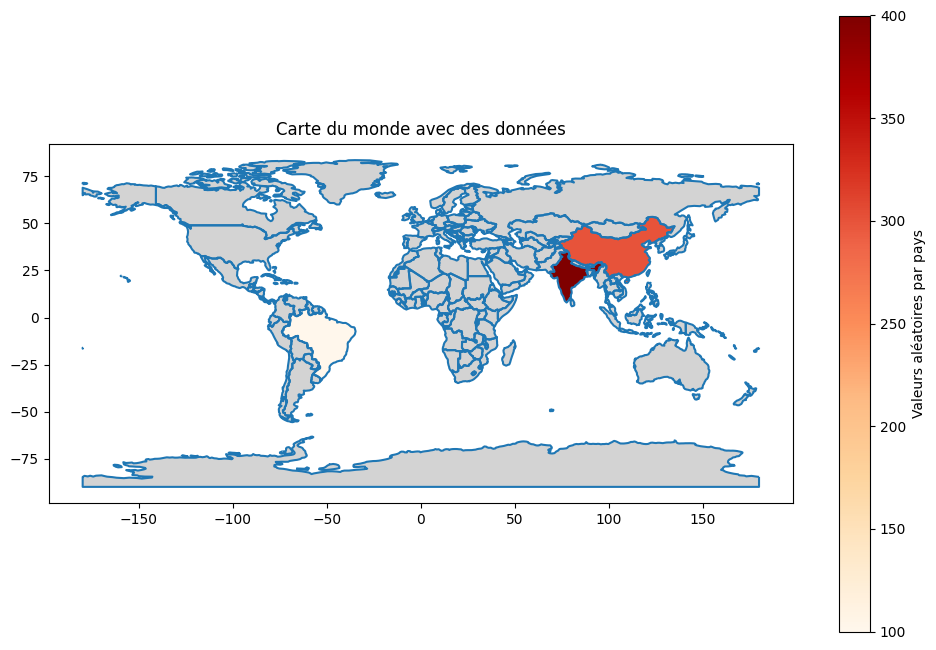

In [300]:
### 31 Avec Matplotlib, tracez l'évolution de la population (pop_1000_hab) de 2018 à 2019 pour les 5 pays les plus peuplés.
# Utilisez un graphique en barres pour chaque pays pour comparer les deux années.

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Charger le jeu de données du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer des données aléatoires pour illustration
np.random.seed(42)
# data = {
#     'name': world['name'],  # Utiliser les noms des pays du jeu de données world
#     'value': np.random.randint(1, 100, size=len(world))  # Valeurs aléatoires
# }
data = {
    'name': ['Brazil', 'United States', 'India', 'China'],
    'value': [100, 400, 400, 300]
}
df = pd.DataFrame(data)

# Fusionner les données avec le jeu de données du monde en fonction du nom du pays
world = world.merge(df, how='left', on='name')

# Afficher la carte du monde avec les données
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax)
world.plot(column='value', ax=ax, legend=True,
           legend_kwds={'label': "Valeurs aléatoires par pays"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Carte du monde avec des données')
plt.show()


In [301]:
### 32 Récupérer d’une source externe le PIB par habitant et calculer le coefficient de corrélation de pearson entre le PIB/hab et
# la disponibilité alimentaire par habitant.



In [315]:
df = df_merge2[df_merge2['name'].isnull()]

df = df['area'].unique()

# noms_des_pays['name']
# df.to_csv('df.csv', index=False)
df

array(['Antigua and Barbuda', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Solomon Islands', 'Cabo Verde', 'Central African Republic',
       'China, Taiwan Province of', 'Comoros',
       'Democratic Republic of the Congo', 'Dominica',
       'Dominican Republic', 'French Polynesia', 'Kiribati', 'Grenada',
       'China, Hong Kong SAR', 'Iran (Islamic Republic of)',
       "Democratic People's Republic of Korea", 'Republic of Korea',
       "Lao People's Democratic Republic", 'China, Macao SAR', 'Maldives',
       'Malta', 'Mauritius', 'Republic of Moldova', 'Nauru',
       'Netherlands (Kingdom of the)', 'Micronesia (Federated States of)',
       'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Sao Tome and Principe',
       'Seychelles', 'Viet Nam', 'South Sudan', 'Eswatini',
       'Syrian Arab Republic', 'Türkiye',
       'United Kingdom of Great Britain and Northern Ire